In [215]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import csv
import os

# Imports the method used for connecting to DBs
from sqlalchemy import create_engine, MetaData

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float

import pandas as pd 
import matplotlib.pyplot as plt 




In [216]:
#Data common to macro level - Bay Area and Micro level - Counties.

#InterestRates - Data goes back to 1963 
InterestRatesDf =  pd.read_csv(os.path.join("resources","HistoricalData","FHFB_Historical_InterestRates.csv"))

#InterestRatesDf["Year"] = InterestRatesDf["Year"].apply(np.round)
#InterestRatesDf.Year.astype(float).round().astype(int)
InterestRatesDf = InterestRatesDf[["Year","Effective_Rate"]]
InterestRatesDf =InterestRatesDf.rename(columns = {"Effective_Rate": "Interest_Rate"})
InterestRatesDf = InterestRatesDf.dropna()
InterestRatesDf["Year"] = InterestRatesDf.Year.astype(float).round().astype(int)
InterestRatesDf = InterestRatesDf[InterestRatesDf.Year> 1989]
InterestRatesDf.set_index('Year',inplace = True)

In [217]:

#County level data#County l 

##HousingAffordabilityIndex: Percent of population that can afford to buy a home priced at the median price level 
##- goes back to 1991
########Data for Napa and Solana counties is avaliable only from 2010.

HousingAffordavilityIndexMonthlyDf = pd.read_csv(os.path.join("resources","HistoricalData","Historical_Housing_Affordability_BayAreaCounties.csv"))

HousingAffordavilityIndexMonthlyAlmedaDf = HousingAffordavilityIndexMonthlyDf[["Month/QTR","Alameda","Year"]]
HousingAffordavilityIndexMonthlyAlmedaDf = HousingAffordavilityIndexMonthlyAlmedaDf.dropna()
HousingAffordavilityIndexMonthlyAlmedaDf["Year"] = HousingAffordavilityIndexMonthlyAlmedaDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlyContraCostaDf = HousingAffordavilityIndexMonthlyDf[["Month/QTR","Contra Costa","Year"]]
HousingAffordavilityIndexMonthlyContraCostaDf = HousingAffordavilityIndexMonthlyContraCostaDf.dropna()
HousingAffordavilityIndexMonthlyContraCostaDf["Year"] = HousingAffordavilityIndexMonthlyContraCostaDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlyMarinDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Marin","Year"]]
HousingAffordavilityIndexMonthlyMarinDf = HousingAffordavilityIndexMonthlyMarinDf.dropna()
HousingAffordavilityIndexMonthlyMarinDf["Year"] = HousingAffordavilityIndexMonthlyMarinDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlyNapaDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Napa","Year"]]
HousingAffordavilityIndexMonthlyNapaDf = HousingAffordavilityIndexMonthlyNapaDf.dropna()
HousingAffordavilityIndexMonthlyNapaDf["Year"] = HousingAffordavilityIndexMonthlyNapaDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySanFranciscoDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","San Francisco","Year"]]
HousingAffordavilityIndexMonthlySanFranciscoDf = HousingAffordavilityIndexMonthlySanFranciscoDf.dropna()
HousingAffordavilityIndexMonthlySanFranciscoDf["Year"] = HousingAffordavilityIndexMonthlySanFranciscoDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySanMateoDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","San Mateo","Year"]]
HousingAffordavilityIndexMonthlySanMateoDf = HousingAffordavilityIndexMonthlySanMateoDf.dropna()
HousingAffordavilityIndexMonthlySanMateoDf["Year"] = HousingAffordavilityIndexMonthlySanMateoDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySantaClaraDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Santa Clara","Year"]]
HousingAffordavilityIndexMonthlySantaClaraDf = HousingAffordavilityIndexMonthlySantaClaraDf.dropna()
HousingAffordavilityIndexMonthlySantaClaraDf["Year"] = HousingAffordavilityIndexMonthlySantaClaraDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySolanoDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Solano","Year"]]
HousingAffordavilityIndexMonthlySolanoDf = HousingAffordavilityIndexMonthlySolanoDf.dropna()
HousingAffordavilityIndexMonthlySolanoDf["Year"] = HousingAffordavilityIndexMonthlySolanoDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySonomaDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Sonoma","Year"]]
HousingAffordavilityIndexMonthlySonomaDf = HousingAffordavilityIndexMonthlySonomaDf.dropna()
HousingAffordavilityIndexMonthlySonomaDf["Year"] = HousingAffordavilityIndexMonthlySonomaDf.Year.astype(float).round().astype(int)


HousingAffordavilityIndexMonthlyBayAreaDf= HousingAffordavilityIndexMonthlyDf[["Month/QTR","BayAreaAvg","Year"]]
HousingAffordavilityIndexMonthlyBayAreaDf = HousingAffordavilityIndexMonthlyBayAreaDf.dropna()
HousingAffordavilityIndexMonthlyBayAreaDf["Year"] = HousingAffordavilityIndexMonthlyBayAreaDf.Year.astype(float).round().astype(int)


# Population data goes back to 1960
PopulationCountyDf = pd.read_csv(os.path.join("resources","HistoricalData","Population_by_county.csv"))
PopulationCountyDf = PopulationCountyDf[["County","Year","Population"]]

PopulationAlmedaDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Alameda County"]
PopulationContraCostaDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Contra Costa County"]
PopulationMarinDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Marin County"]
PopulationNapaDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Napa County"]
PopulationSanFranciscoDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="San Francisco County"]
PopulationSanMateoDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="San Mateo County"]
PopulationSantaClaraDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Santa Clara County"]
PopulationSolanoDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Solano County"]
PopulationSonomaaDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Sonoma County"]

#Housing Growrth - Number of new units added per year. Data goes back to 1990
HousingGrowthCountyDf = pd.read_csv(os.path.join("resources","HistoricalData","Housing_Production_by_county.csv"))
HousingGrowthCountyDf = HousingGrowthCountyDf[["County","Year","Total Annual Production"]]

HousingGrowthAlmedaDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Alameda County"]
HousingGrowthContraCostaDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Contra Costa County"]
HousingGrowthMarinDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Marin County"]
HousingGrowthNapaDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Napa County"]
HousingGrowthSanFranciscoDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="San Francisco County"]
HousingGrowthSanMateoDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="San Mateo County"]
HousingGrowthSantaClaraDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Santa Clara County"]
HousingGrowthSolanoDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Solano County"]
HousingGrowthSonomaDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Sonoma County"]

#Median Housing Price

#Median prices of existing homes. Data goesback to 1990 . This might be a better measure of home prices (trends)
MedianHomePricesExistingDf = pd.read_csv(os.path.join("resources","HistoricalData","Annual_Home_Prices_by_county.csv"))

MedianHomePricesExistingDf

MedianHomePricesAlamedaDf = MedianHomePricesExistingDf[["Year", "Alameda"]]
MedianHomePricesContraCostaDf = MedianHomePricesExistingDf[["Year", "Contra Costa"]]
MedianHomePricesMarinDf = MedianHomePricesExistingDf[["Year", "Marin"]]
MedianHomePricesNapaDf = MedianHomePricesExistingDf[["Year", "Napa"]]
MedianHomePricesSanFranciscoDf = MedianHomePricesExistingDf[["Year", "San Francisco"]]
MedianHomePricesSanMateoDf = MedianHomePricesExistingDf[["Year", "San Mateo"]]
MedianHomePricesSantaClaraDf = MedianHomePricesExistingDf[["Year", "Santa Clara"]]
MedianHomePricesSolanoDf = MedianHomePricesExistingDf[["Year", "Solano"]]
MedianHomePricesSonomaDf = MedianHomePricesExistingDf[["Year", "Sonoma"]]

#Wage data
WagesDf = pd.read_csv(os.path.join("resources","HistoricalData","WageData_by_county.csv"))
WagesDf = WagesDf.rename(columns = {"Area": "County"})


WagesAlmedaDf = WagesDf.loc[WagesDf["County"] =="Alameda County, California"]
WagesContraCostaDf = WagesDf.loc[WagesDf["County"] =="Contra Costa County, California"]
WagesMarinDf = WagesDf.loc[WagesDf["County"] =="Marin County, California"]
WagesNapaDf = WagesDf.loc[WagesDf["County"] =="Napa County, California"]
WagesSanFranciscoDf = WagesDf.loc[WagesDf["County"] =="San Francisco County, California"]
WagesSanMateoDf = WagesDf.loc[WagesDf["County"] =="San Mateo County, California"]
WagesSantaClaraDf = WagesDf.loc[WagesDf["County"] =="Santa Clara County, California"]
WagesSolanoDf = WagesDf.loc[WagesDf["County"] =="Solano County, California"]
WagesSonomaDf = WagesDf.loc[WagesDf["County"] =="Sonoma County, California"]

In [231]:

#BayArea level data

# Read the data and cleaning it up


# Population data goes back to 1960
PopulationDf = pd.read_csv(os.path.join("resources","HistoricalData","Population_Bay_Area.csv"))
#Selecting records from PopulationDf where the Year >= 1989
PopulationDf = PopulationDf[PopulationDf.Year> 1989]
PopulationGrowthDf = PopulationDf
PopulationDf = PopulationDf[["Year","Population"]]


#Housing Production - Number of new units added per year. Data goes back to 1990
HousingGrowthDf = pd.read_csv(os.path.join("resources","HistoricalData","Housing_Production_Bay_Area.csv"))
HousingGrowthDf = HousingGrowthDf[["Year","Total Annual Production"]]
HousingGrowthDf = HousingGrowthDf.rename(columns = {"Total Annual Production": "New Homes Constructed"})


#Median home prices. Data goes back to 1997. Stops at 2015. MedPrice_IA indicates median price adjusted for Inflation. 
MedianHomePricesDf = pd.read_csv(os.path.join("resources","HistoricalData","Home_Prices_Bay_Area.csv"))

#Median prices of existing homes. Data goesback to 1990 . This might be a better measure of home prices (trends)
MedianHomePricesExistingDf = pd.read_csv(os.path.join("resources","HistoricalData","MedianPricesofExistingDetachedHomesHistoricalData.csv"))

MedianHomePricesExistingAnnualDf = MedianHomePricesExistingDf.groupby(['Year']).agg({'S.F. Bay Area':['mean']})
MedianHomePricesExistingAnnualDf.reset_index(inplace = True)
MedianHomePricesExistingAnnualDf.columns=[''.join(col) for col in MedianHomePricesExistingAnnualDf.columns]

MedianHomePricesExistingAnnualDf["S.F. Bay Areamean"] = MedianHomePricesExistingAnnualDf["S.F. Bay Areamean"].astype(float).round().astype(int)
MedianHomePricesExistingAnnualDf= MedianHomePricesExistingAnnualDf.rename(columns = {"S.F. Bay Areamean":"Avg.Median Home price"})
#pd.DataFrame(MedianHomePricesExistingAnnualDf.to_records())
#MedianHomePricesExistingAnnualDf.set_index('Year',inplace = True)

#HousingAffordabilityIndex: Percent of population that can afford to buy a home priced at the median price level - goes back to 1991
HousingAffordavilityIndexDf = pd.read_csv(os.path.join("resources","HistoricalData","Historical_Housing_Affordability_BayAreaCounties.csv"))
HAIExistingAnnualDf = HousingAffordavilityIndexDf.groupby(['Year']).agg({'BayAreaAvg':['mean']})
HAIExistingAnnualDf.reset_index(inplace = True)
HAIExistingAnnualDf.columns=[''.join(col) for col in HAIExistingAnnualDf.columns]
#HAIExistingAnnualDf.set_index('Year',inplace = True)

#Rents 1970, 1980, 1990, 2000, 2006 to 2015
RentTrendsDf =  pd.read_csv(os.path.join("resources","HistoricalData","Rents_Bay_Area.csv"))

# Average Annual Wages, number of employers, number of employees -
# Data goes back to 1990
WagesGrpDf = WagesDf.groupby(['Year']).agg({'Num_Employers':['sum'],'Num_Employees':['sum'],'AvgAnnualPay' : ['mean']})

WagesGrpDf.reset_index(inplace = True)
WagesGrpDf.columns=[''.join(col) for col in WagesGrpDf.columns]
WagesBayAreaDf =WagesGrpDf.rename(columns ={'Num_Employerssum': "Employers", 'Num_Employeessum': "Employees", 'AvgAnnualPaymean' : "AvgAnnualPay"})

#Migration
MigrationDf = pd.read_csv(os.path.join("resources","HistoricalData","BayAreaMigration_90_17.csv"))
MigrationDf = MigrationDf.dropna()
#MigrationDf.set_index('Year',inplace = True)

#Households

HouseholdsDf = pd.read_csv(os.path.join("resources","HistoricalData","Households_90_18_by_Bay_Area.csv"))
HouseholdsDf = HouseholdsDf.dropna()
#HouseholdsDf.set_index('Year',inplace = True)

#PopulationDf
#WagesBayAreaDf
#HousingGrowthDf 
#MedianHomePricesExistingAnnualDf
#HAIExistingAnnualDf
#HouseholdsDf
#Migration



#summaryDf  = PopulationDf

merdf1 = pd.merge(PopulationDf,WagesBayAreaDf,how = 'outer', on='Year')
#merdf1.reset_index()
merdf1

merdf2 = pd.merge(HousingGrowthDf,MedianHomePricesExistingAnnualDf,how = 'outer', on='Year')
#merdf2.reset_index()
merdf2

merdf3 = pd.merge(merdf1,merdf2,how = 'outer', on='Year')

merdf4  = pd.merge(HouseholdsDf,MigrationDf,how = 'outer', on='Year')
merdf5 = pd.merge(merdf4,merdf3,how = 'outer', on='Year')

BayAreaSummaryDf=  pd.merge(merdf5,InterestRatesDf,how = 'outer', on='Year')
BayAreaSummaryDf1 = BayAreaSummaryDf.dropna()
BayAreaSummaryDf = BayAreaSummaryDf.dropna()
#BayAreaSummaryDf.set_index("Year",inplace = True)
BayAreaSummaryDf

#population growth Vs housing Growth 
PopulationGrowthDf = PopulationGrowthDf[["Year","PopulationGrowth"]]
PopHHGrowthDf  = pd.merge(PopulationGrowthDf,HousingGrowthDf,how = 'outer', on='Year')

PopulationGrowthDf.set_index('Year',inplace = True)
#PopHHGrowthDf.set_index('Year',inplace = True)

BayAreaSummaryDf.to_csv(os.path.join("resources","HistoricalData","BayAreaSummary.csv"))
BayAreaSummaryDf

,TotalPop,HouseholdPop,EstHouseholds,Year,Net_Migration,Immigration,Domestic_Migration,Population,Employers,Employees,AvgAnnualPay,New Homes Constructed,Avg.Median Home price,Interest_Rate
0,6063929.0,5914746.0,2268498.0,1991,26173.0,45028.0,-18855.0,6063929.0,184128.0,2942366.0,28240.444444,16396.0,234197,9.34
1,6150405.0,5996580.0,2288446.0,1992,32671.0,49980.0,-17309.0,6150405.0,195298.0,2887645.0,30080.888889,16857.0,233964,8.11
2,6236622.0,6084002.0,2308925.0,1993,30248.0,50644.0,-20396.0,6236622.0,202087.0,2879500.0,30708.555556,13781.0,232320,7.13
3,6296661.0,6144064.0,2326344.0,1994,-13351.0,41806.0,-55157.0,6296661.0,199363.0,2900397.0,31565.111111,14482.0,238903,7.49
4,6330094.0,6180022.0,2344173.0,1995,-18169.0,32940.0,-51109.0,6330094.0,214307.0,2964060.0,32787.777778,14371.0,239315,7.85
5,6375868.0,6226805.0,2361460.0,1996,15409.0,41153.0,-25744.0,6375868.0,211511.0,3078411.0,34109.444444,14641.0,247183,7.74
6,6462873.0,6319290.0,2377851.0,1997,65206.0,43495.0,21711.0,6462873.0,205387.0,3182397.0,36455.222222,21330.0,268918,7.68
7,6566673.0,6424287.0,2402456.0,1998,48477.0,34007.0,14470.0,6566673.0,225328.0,3303428.0,38529.555556,23432.0,300666,7.10
8,6659001.0,6516283.0,2429417.0,1999,42419.0,28288.0,14131.0,6659001.0,230764.0,3391396.0,41957.000000,26665.0,346852,7.25
9,7216004.0,7061916.0,2632156.0,2000,73140.0,49277.0,23863.0,6757390.0,220469.0,3545274.0,48065.666667,24568.0,433890,7.96


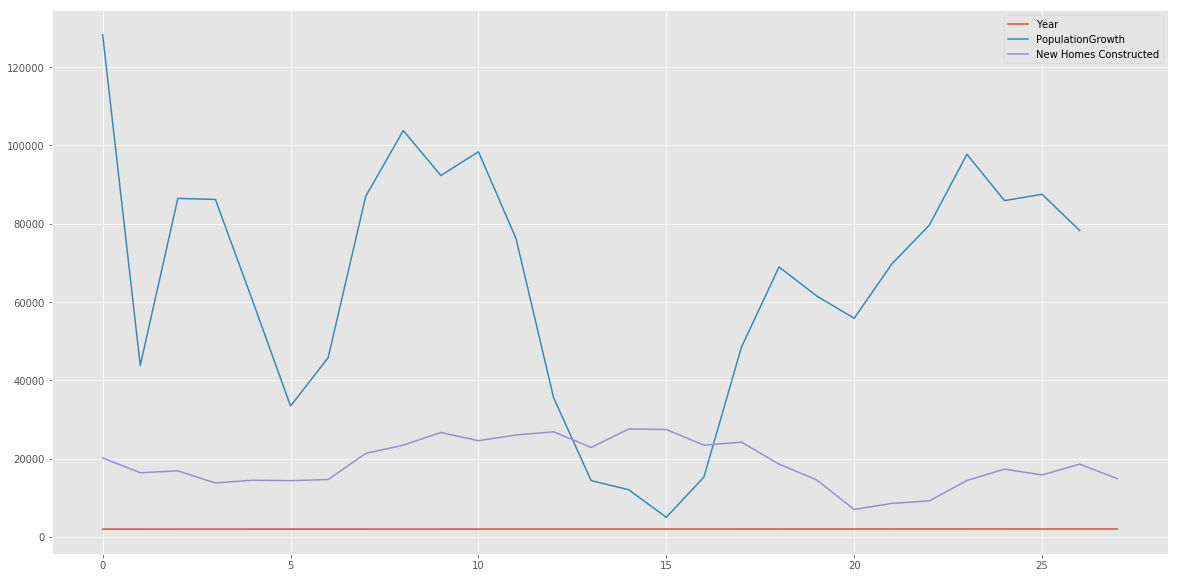

In [219]:
PopHHGrowthDf.plot(figsize=(20,10))


In [220]:
# Hypothesis : 

# The housing growth rate is not keeping up with the population growth rate and hence the increase in the median housing prices.

In [221]:

TestDf  = BayAreaSummaryDf.pct_change()
TestDf

,TotalPop,HouseholdPop,EstHouseholds,Year,Net_Migration,Immigration,Domestic_Migration,Population,Employers,Employees,AvgAnnualPay,New Homes Constructed,Avg.Median Home price,Interest_Rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.014261,0.013836,0.008793,0.000502,0.248271,0.109976,-0.081994,0.014261,0.060664,-0.018598,0.065171,0.028117,-0.000995,-0.131692
2,0.014018,0.014579,0.008949,0.000502,-0.074164,0.013285,0.178347,0.014018,0.034762,-0.002821,0.020866,-0.182476,-0.007027,-0.120838
3,0.009627,0.009872,0.007544,0.000502,-1.441385,-0.174512,1.704305,0.009627,-0.013479,0.007257,0.027893,0.050867,0.028336,0.050491
4,0.005310,0.005852,0.007664,0.000502,0.360872,-0.212075,-0.073391,0.005310,0.074959,0.021950,0.038735,-0.007665,0.001725,0.048064
5,0.007231,0.007570,0.007374,0.000501,-1.848093,0.249332,-0.496292,0.007231,-0.013047,0.038579,0.040310,0.018788,0.032877,-0.014013
6,0.013646,0.014853,0.006941,0.000501,3.231683,0.056910,-1.843342,0.013646,-0.028954,0.033779,0.068772,0.456868,0.087931,-0.007752
7,0.016061,0.016615,0.010348,0.000501,-0.256556,-0.218140,-0.333518,0.016061,0.097090,0.038031,0.056901,0.098547,0.118058,-0.075521
8,0.014060,0.014320,0.011222,0.000501,-0.124966,-0.168171,-0.023428,0.014060,0.024125,0.026629,0.088956,0.137974,0.153612,0.021127
9,0.083647,0.083734,0.083452,0.000500,0.724227,0.741975,0.688699,0.014775,-0.044613,0.045373,0.145594,-0.078642,0.250937,0.097931


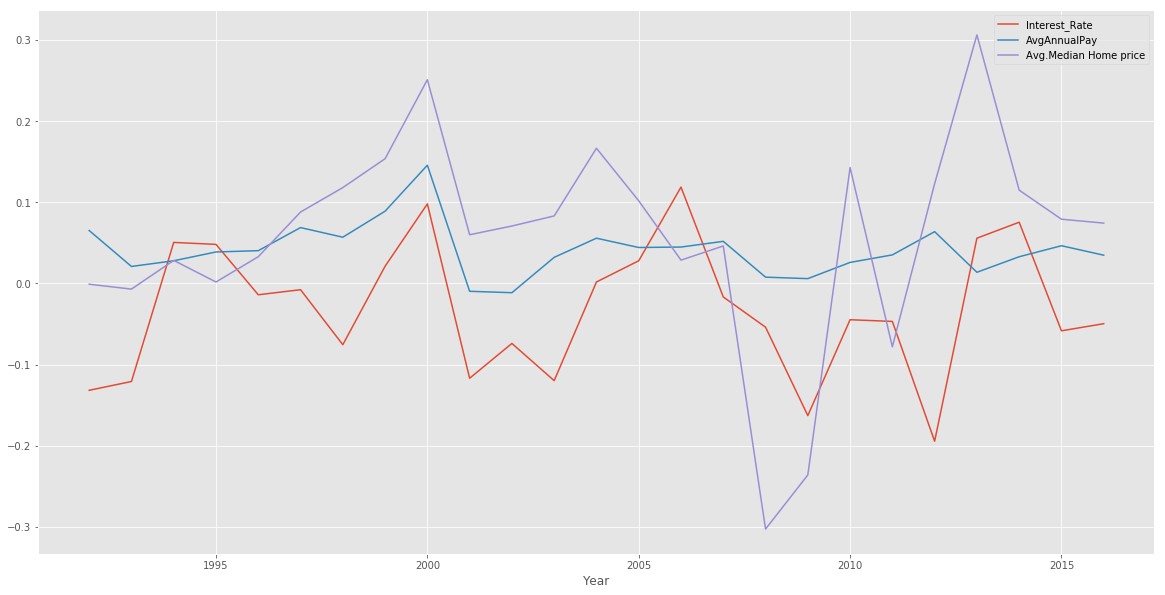

In [222]:
#% Growth Comparisons

%matplotlib inline
#plt.figure(figsize=(20,10))
#PopulationDf
PopEmplNewHHMedianPriceDf  = BayAreaSummaryDf1[["Year","Interest_Rate","AvgAnnualPay","Avg.Median Home price"]]
PopEmplNewHHMedianPriceDf.set_index("Year",inplace = True)
PopEmplNewHHMedianPriceDfTestDf1 = PopEmplNewHHMedianPriceDf.pct_change()
PopEmplNewHHMedianPriceDfTestDf1.plot(figsize=(20,10))


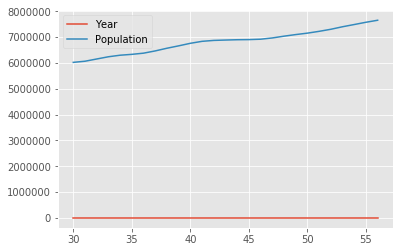

In [223]:
PopulationDf.plot()

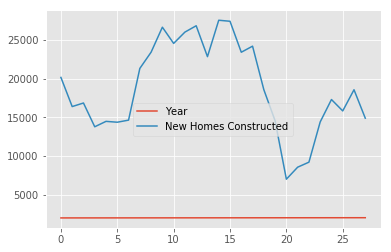

In [224]:
HousingGrowthDf.plot()

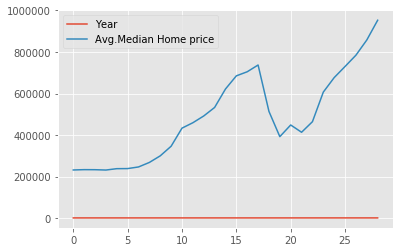

In [225]:
MedianHomePricesExistingAnnualDf.plot()

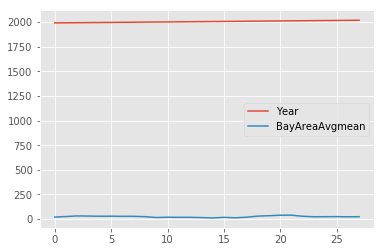

In [226]:
HAIExistingAnnualDf.plot()

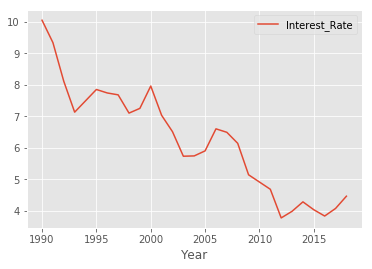

In [227]:
InterestRatesDf.plot()

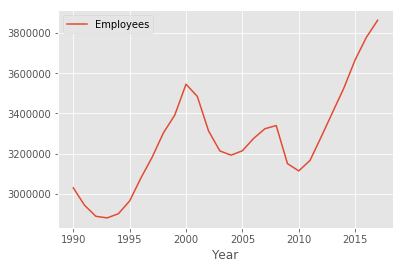

In [228]:
JobsDf = WagesBayAreaDf[["Year","Employees"]]
JobsDf.set_index("Year",inplace = True)
JobsDf.plot()

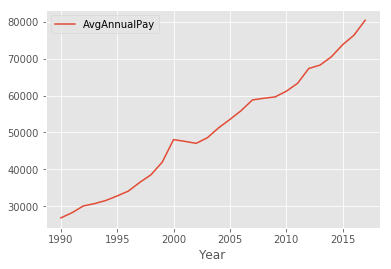

In [229]:
WageGrowthDf = WagesBayAreaDf[["Year","AvgAnnualPay"]]
WageGrowthDf.set_index("Year",inplace = True)
WageGrowthDf.plot()

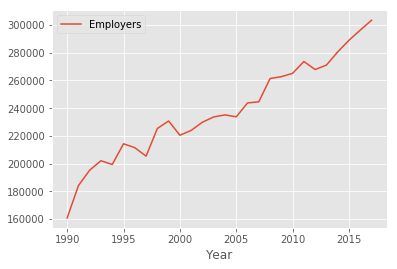

In [230]:
EmployerGrowthDf = WagesBayAreaDf[["Year","Employers"]]
EmployerGrowthDf.set_index("Year",inplace = True)
EmployerGrowthDf.plot()